In [1]:
%matplotlib inline

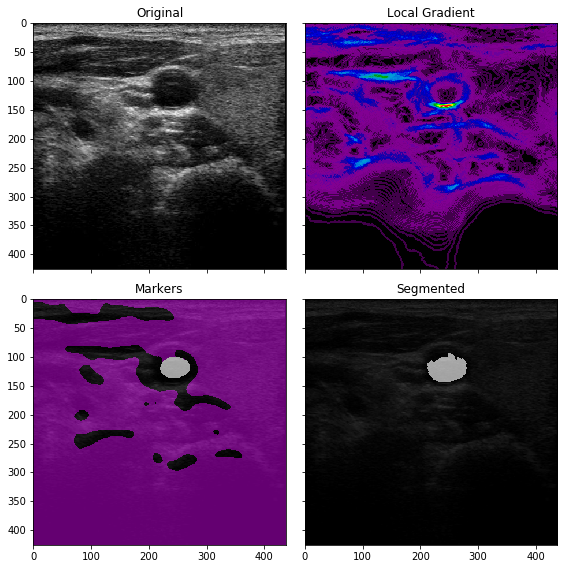

In [99]:
from scipy import ndimage as ndi
import matplotlib.pyplot as plt

from skimage import io
from skimage import img_as_ubyte
from skimage.color import rgb2gray

from skimage.morphology import watershed, disk
from skimage import data
from skimage.filters import rank
from skimage.util import img_as_ubyte

import numpy as np
import warnings

img_path = 'patient_1.png'
image = io.imread(img_path)
image = rgb2gray(image)

#io.imshow(image)
#io.show()

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    image = img_as_ubyte(image)

# denoise image
denoised = rank.median(image, disk(30))

# find continuous region (low gradient -
# where less than 10 for this image) --> markers
# disk(5) is used here to get a more smooth image
markers = rank.gradient(denoised, disk(5)) < 12
markers = ndi.label(markers)[0]

# denoise image
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    markers = rank.median(markers, disk(12))

# local gradient (disk(2) is used to keep edges thin)
gradient = rank.gradient(denoised, disk(2))

# process the watershed
labels = watershed(gradient, markers)
#labels = ndi.binary_fill_holes(labels-1)

# display results
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8), sharex=True, sharey=True, subplot_kw={'adjustable':'box-forced'})
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title("Original")

ax[1].imshow(gradient, cmap=plt.cm.spectral, interpolation='nearest')
ax[1].set_title("Local Gradient")

ax[2].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax[2].imshow(markers, cmap=plt.cm.spectral, interpolation='nearest', alpha=.8)
ax[2].set_title("Markers")

ax[3].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax[3].imshow(labels, cmap=plt.cm.spectral, interpolation='nearest', alpha=.8)
ax[3].set_title("Segmented")

#for a in ax:
#    a.axis('off')

fig.tight_layout()
plt.show()